# Предобработка данных

1. Загрузите данные о пассажирах Титаника и познакомьтесь со структурой датасета.
2. Проведите анализ и визуализацию каждого признака датасета. Сделайте вывод о виде распределения и шкале каждого признака.
3. Проанализируйте влияние каждого признака на целевую переменную. Проиллюстрируйте ее графиками.
4. Исследуйте и исправьте при необходимости пропущенные значения в датасете.
5. Преобразуйте категориальные признаки в численные самым подходящим способом.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
training_set = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023_new/ML5.4%20EDA/titanic.csv')
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
training_set.shape

(891, 12)

Это нужно для нечисловых данных, когда нельзя просто посчитать максимумы/среднее/и пр. для данных. Мы можем отнести такие данные к категориальному виду

In [5]:
training_set.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


**Описание каждого признака**

In [6]:
def custom_hist(training_set, title,  xlabel, ylabel='Количество', bins=None):
    figsize = (20,6)
    plt.figure(figsize=figsize)
    plt.grid(True)
    plt.title(title)
    plt.hist(training_set, int(training_set.max()) if bins is None else bins)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

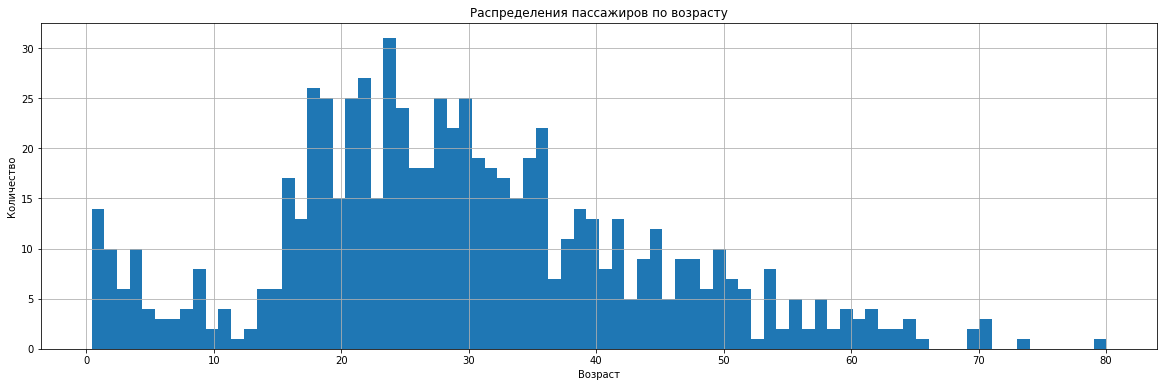

In [7]:
custom_hist(training_set["Age"], 'Распределения пассажиров по возрасту', 'Возраст')

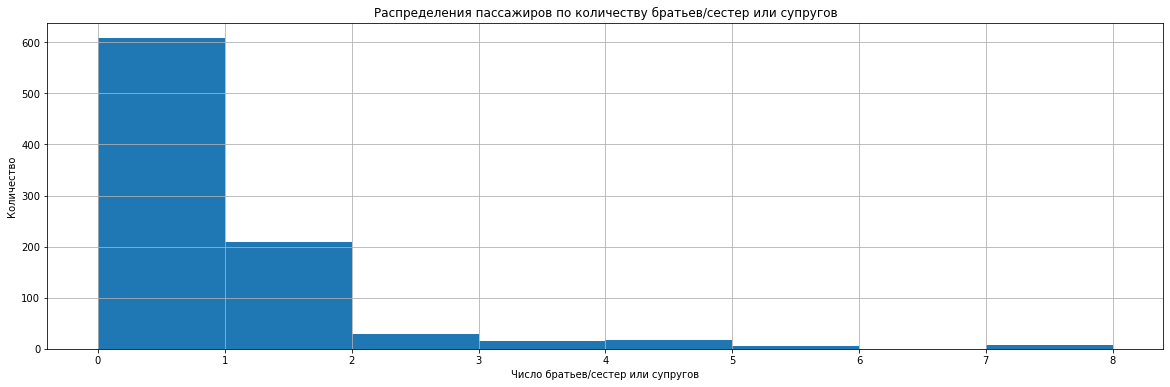

In [8]:
custom_hist(training_set["SibSp"], 'Распределения пассажиров по количеству братьев/сестер или супругов', 
  'Число братьев/сестер или супругов')

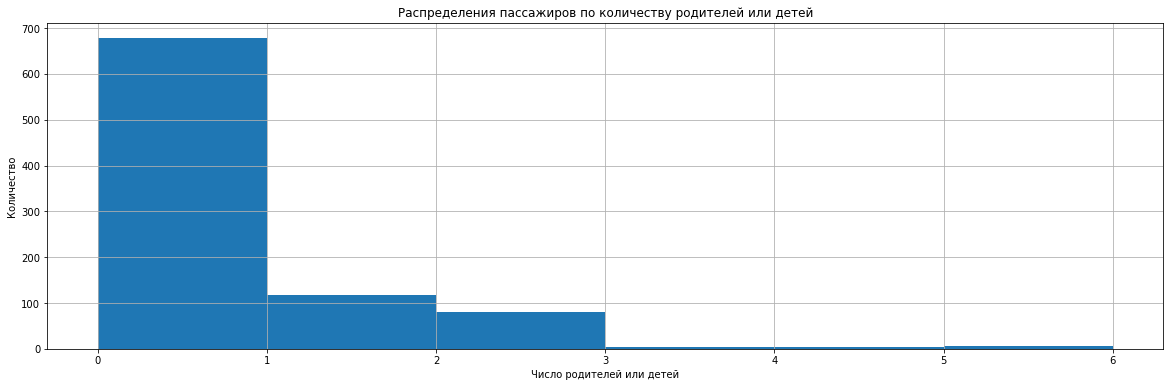

In [9]:
custom_hist(training_set["Parch"], 'Распределения пассажиров по количеству родителей или детей', 
  'Число родителей или детей')

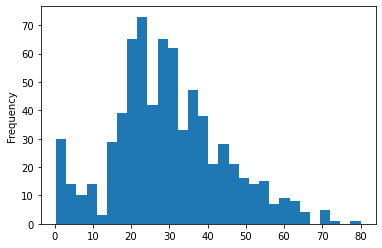

In [10]:
training_set['Age'].plot.hist(bins=30);

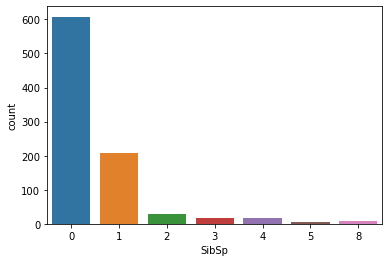

In [11]:
sns.countplot(x='SibSp', data=training_set);

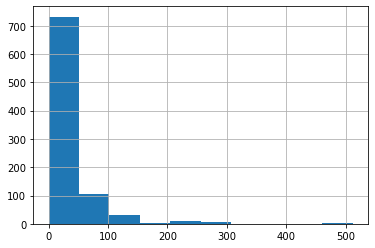

In [12]:
training_set['Fare'].hist();

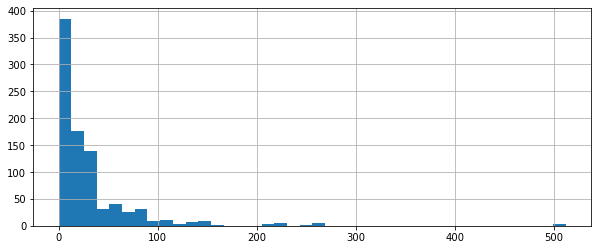

In [13]:
training_set['Fare'].hist(bins=40, figsize=(10,4));

**Описание вида совместного распределения**

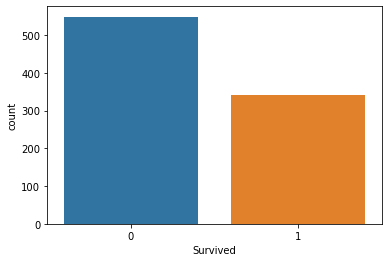

In [14]:
sns.countplot(x='Survived', data=training_set);

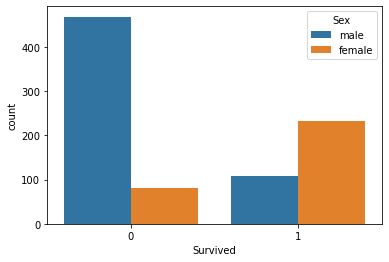

In [15]:
sns.countplot(x='Survived', data=training_set, hue='Sex');

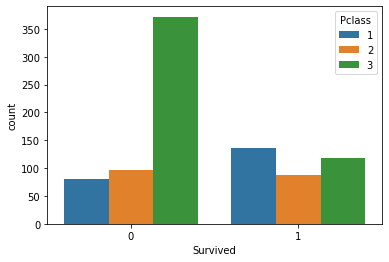

In [16]:
sns.countplot(x='Survived', data=training_set, hue='Pclass');

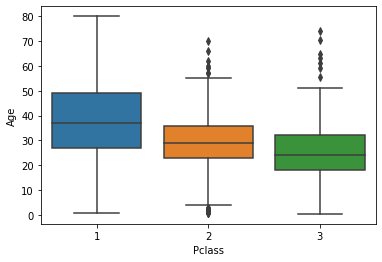

In [17]:
sns.boxplot(x='Pclass', y='Age', data=training_set);

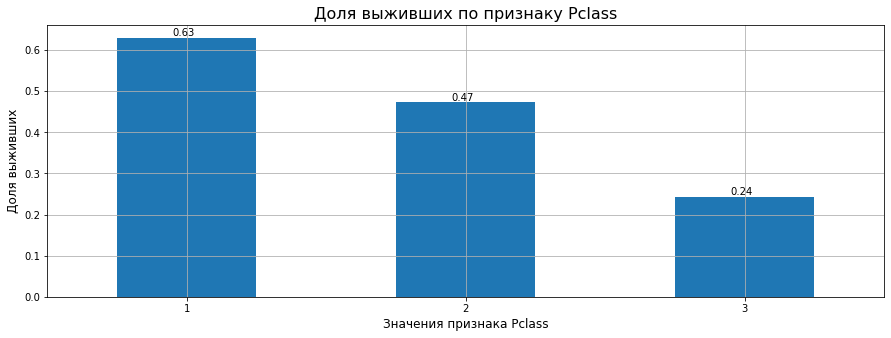

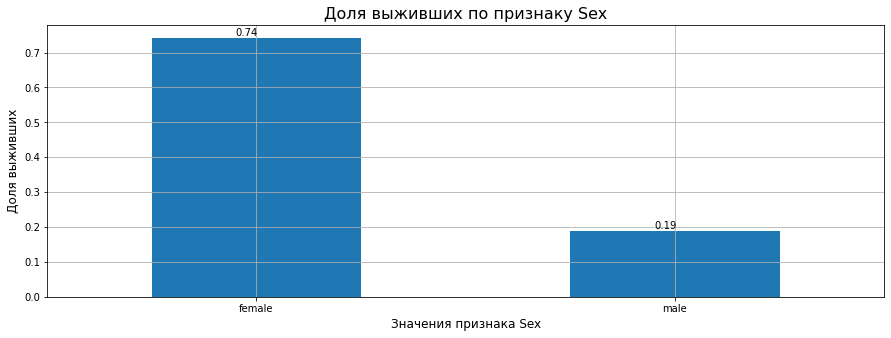

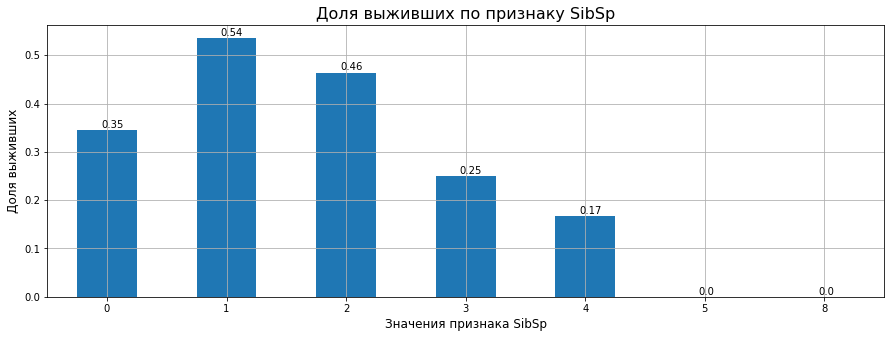

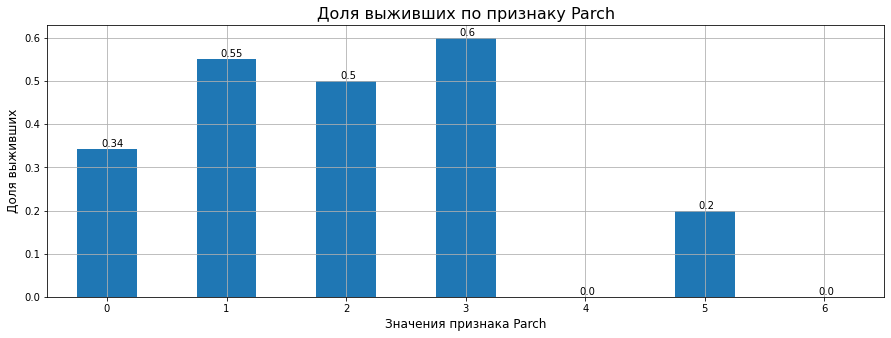

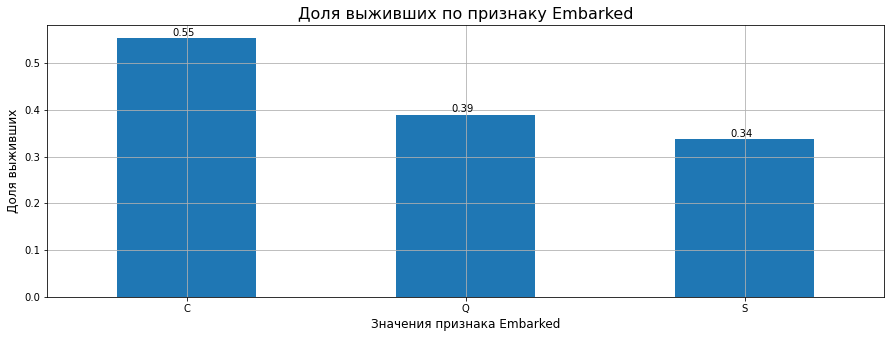

In [18]:
columns_to_look = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

for column in columns_to_look:
    pivot = training_set.pivot_table(index=column, values='Survived', aggfunc='mean')
    
    fig, ax = plt.subplots(figsize=(15,5))
    ax.set_title(f'Доля выживших по признаку {column}', fontdict={'size': 16})
    ax.set_ylabel('Доля выживших', fontdict={'size': 12})
    ax.set_xlabel(column, fontdict={'size': 12})
    
    for cnt in range(pivot.shape[0]):
        value = pivot.iloc[cnt].values[0]
        ax.text(cnt - .05, value + .005, round(value, 2))
        
    pivot.plot(kind='bar', rot=0, grid=True, legend=False, ax=ax) 
    ax.set_xlabel(f'Значения признака {column}', fontdict={'size': 12})
    plt.show()

**Исследование пропущенных значений**

In [19]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
training_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

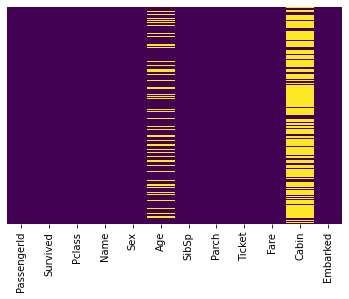

In [21]:
sns.heatmap(training_set.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [22]:
training_set.drop('Cabin', axis=1, inplace=True);

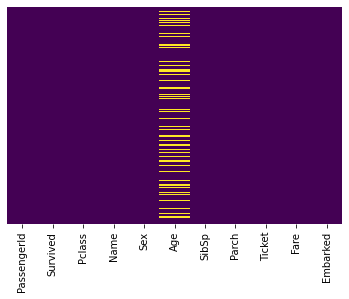

In [23]:
sns.heatmap(training_set.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [24]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [25]:
training_set.dropna(inplace=True)

Перезапустим код и видим что мы не имеем отсутствующих значений. Таким образом мы совершили первый шаг очистки данных, мы очистили наши данные от отсутствующих данных, какие то отсутствующие данные мы заполнили средними значениями, а некоторые просто удалили.

**Преобразование категориальных признаков**

In [26]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
le = LabelEncoder()
cat_enc_le = le.fit_transform(training_set['Sex'])
training_set['Sex'].unique(), np.unique(cat_enc_le)  

(array(['male', 'female'], dtype=object), array([0, 1]))

In [27]:
le.inverse_transform([0,1])

array(['female', 'male'], dtype=object)

В зависимости от данных это преобразование может создать новую проблему. Мы перевели набор стран в набор чисел. Но это всего лишь категориальные данные, и между числами на самом деле нет никакой связи. Проблема здесь в том, что, поскольку разные числа в одном столбце, модель неправильно подумает, что данные находятся в каком-то особом порядке — 0 < 1 < 2 Хотя это, конечно, совсем не так.

Поэтому LabelEncoder можно применять с осторожностью. По этому принципу можно преобразовывать бинарные переменные (такие как пол) или переменные, измеренные по ординальной шкале. Но ординальные переменные надо преобразовывать не в случайном порядке, а в строго определенном, в естественном порядке.

Для решения проблемы мы используем OneHotEncoder. Этот кодировщик берёт столбец с категориальными данными, который был предварительно закодирован в признак, и создаёт для него несколько новых столбцов. Числа заменяются на единицы и нули, в зависимости от того, какому столбцу какое значение присуще.

In [28]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(training_set[['Embarked']])  # Вызываем метод fit_transform, возвращает разреженную матрицу из библиотеки Scipy 

In [29]:
training_set.shape

(712, 11)

In [30]:
cat_enc_ohe.shape

(712, 3)

То же самое преобразование можно сделать при помощи встроенного в pandas метода get_dummies().

Вызовем метод get_dummies передаем столбец Sex, данный метод конвертирует категориальные переменные в фиктивные переменные, так же они известные как переменные-индикаторы

In [31]:
pd.get_dummies(training_set['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
885,1,0
886,0,1
887,1,0
889,0,1


Получаем такой результат, т.е. у нас два столбца и 0 и 1 в качестве значений, можно расценивать как булевы значения, 0 это False, 1 это True. Первая строка говорит нам о том что male = 1 означает что человек был мужского пола.

Но мы получаем проблему: один столбец идеально предсказывает второй столбец, т.е. если мы зададим такие входные данные в алгоритм машинного обучения, то он поймет что в случае если в одном столбце ноль в другом обязательно будет 1. Эта проблема называется мультиколлинеарностью. Это запутывает алгоритм. Решением будет удаление одного столбца.

In [32]:
pd.get_dummies(training_set['Sex'], drop_first=True)

,male
0,1
1,0
2,0
3,0
4,1
...,...
885,0
886,1
887,0
889,1


In [33]:
sex = pd.get_dummies(training_set['Sex'], drop_first=True)

In [34]:
embark = pd.get_dummies(training_set['Embarked'], drop_first=True)

У нас было три значения S,C,Q по названиям портов отправки, мы отбросили C у нас осталось два столбца, но они не являются предсказателями друг для друга:

In [35]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [36]:
training_set = pd.concat([training_set, sex, embark], axis=1)

Мы видим что у нас остались старые столбцы но так же добавились и новые:

In [37]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


Удаляем ненужные столбцы

In [38]:
training_set.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)
training_set.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [39]:
# 3, 4, 5, 6, 7, 8, 9

# Самостоятельная часть

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023_new/ML5.4%20EDA/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**3. Какова доля выживших после крушения пассажиров? Какова доля мужчин и женщин среди выживших?**

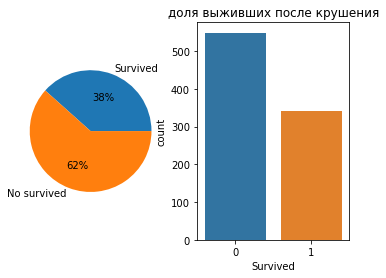

In [90]:
fig, ax = plt.subplots(1,2)
sns.countplot(x='Survived', data=df)
total_survived = df['Survived'].sum()
total_no_survived = len(df) - total_survived
ax[0].pie([total_survived,total_no_survived],labels=['Survived','No survived'],autopct='%1.0f%%')
plt.title('доля выживших после крушения');

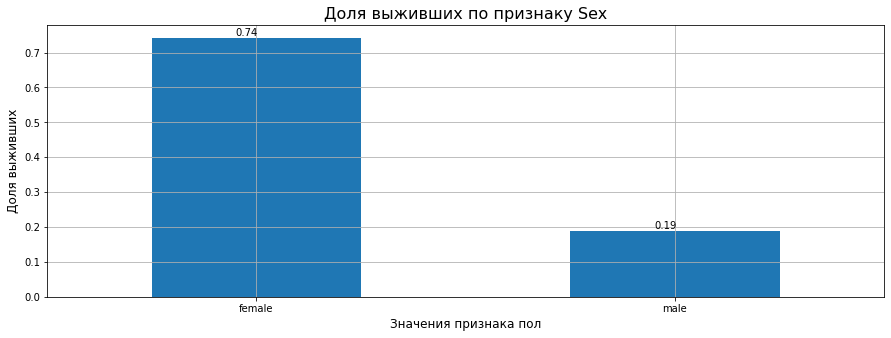

In [13]:
pivot = df.pivot_table(index='Sex', values='Survived', aggfunc='mean')
    
fig, ax = plt.subplots(figsize=(15,5))
ax.set_title(f'Доля выживших по признаку Sex', fontdict={'size': 16})
ax.set_ylabel('Доля выживших', fontdict={'size': 12})
ax.set_xlabel('Sex', fontdict={'size': 12})

for cnt in range(pivot.shape[0]):
    value = pivot.iloc[cnt].values[0]
    ax.text(cnt - .05, value + .005, round(value, 2))

pivot.plot(kind='bar', rot=0, grid=True, legend=False, ax=ax) 
ax.set_xlabel(f'Значения признака пол', fontdict={'size': 12})
plt.show()

**4. Сколько пассажиров ехало в каждом классе? Кого было больше в самом многолюдном классе — мужчин или женщин?**

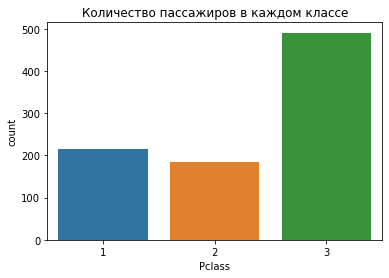

In [89]:
sns.countplot(x='Pclass', data=df)
plt.title('Количество пассажиров в каждом классе');

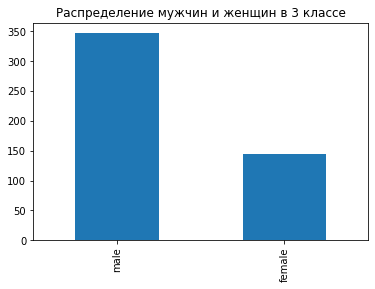

In [62]:
df['Sex'][df['Pclass']==3].value_counts().plot(kind='bar')
plt.title('Распределение мужчин и женщин в 3 классе');

In [15]:
df['Sex'][df['Pclass']==3].value_counts()

male      347
female    144
Name: Sex, dtype: int64

**5. Все ли признаки несут в себе полезную информацию? Почему? Избавьтесь от ненужных столбцов.**

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
df.drop('Cabin', axis=1, inplace=True);

In [19]:
df.drop('Name', axis=1, inplace=True)
df.drop('PassengerId', axis=1, inplace=True)

In [20]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


**6. Посчитайте, насколько сильно коррелируют друг с другом цена за билет и возраст пассажиров. Также проверьте наличие этой зависимости визуально (в этом вам поможет построение диаграммы рассеяния).**

In [21]:
df[['Fare', 'Age']].corr()

,Fare,Age
Fare,1.000000,0.096067
Age,0.096067,1.000000


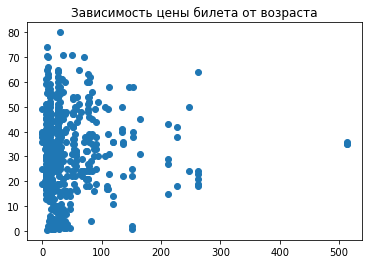

In [88]:
plt.scatter(df['Fare'], df['Age'])
plt.title('Зависимость цены билета от возраста');

**7. Правда ли, что чаще выживали пассажиры с более дорогими билетами? А есть ли зависимость выживаемости от класса?**

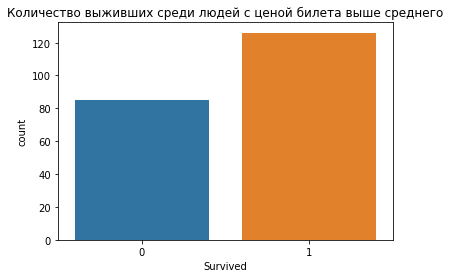

In [63]:
df_ = df[df['Fare'] > df['Fare'].mean()][['Fare', 'Survived']]
sns.countplot(x='Survived', data=df_)
plt.title('Количество выживших среди людей с ценой билета выше среднего');

In [79]:
rich_survived, rich_nsurvived

(126, 85)

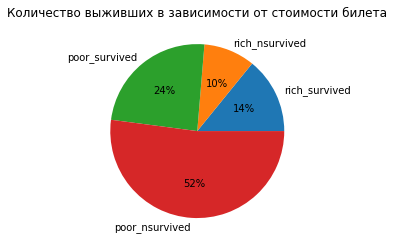

In [81]:
rich_survived = len(df[(df['Fare'] > df['Fare'].mean()) & (df['Survived']==1)])
rich_nsurvived = len(df[(df['Fare'] > df['Fare'].mean()) &(df['Survived']==0)])
poor_survived = len(df[(df['Fare'] < df['Fare'].mean()) &(df['Survived']==1)])
poor_nsurvived = len(df[(df['Fare'] < df['Fare'].mean()) & (df['Survived']==0)])

plt.pie([rich_survived, rich_nsurvived, poor_survived, poor_nsurvived],
        labels=['rich_survived', 'rich_nsurvived', 'poor_survived', 'poor_nsurvived'],autopct='%1.0f%%')

plt.title('Количество выживших в зависимости от стоимости билета');

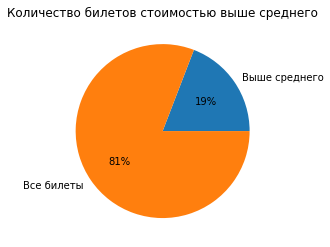

In [83]:
plt.pie([len(df_), len(df)], labels=['Выше среднего','Все билеты'],autopct='%1.0f%%')
plt.title('Количество билетов стоимостью выше среднего');

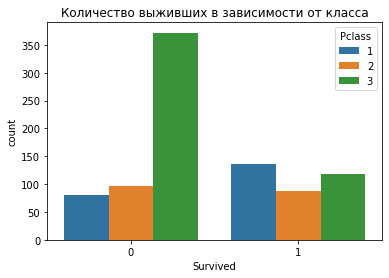

In [84]:
sns.countplot(x='Survived', data=df, hue='Pclass')
plt.title('Количество выживших в зависимости от класса');

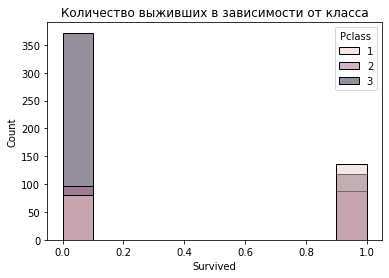

In [85]:
sns.histplot(x = 'Survived', hue = 'Pclass', data = df, bins = 10)
plt.title('Количество выживших в зависимости от класса');

**8. Какова связь между стоимостью билета и портом отправления? Выведите минимальную, среднюю и максимальную сумму, которую заплатили пассажиры за проезд. Проделайте то же самое только для тех пассажиров, которые сели на корабль в Саутгемптоне.**

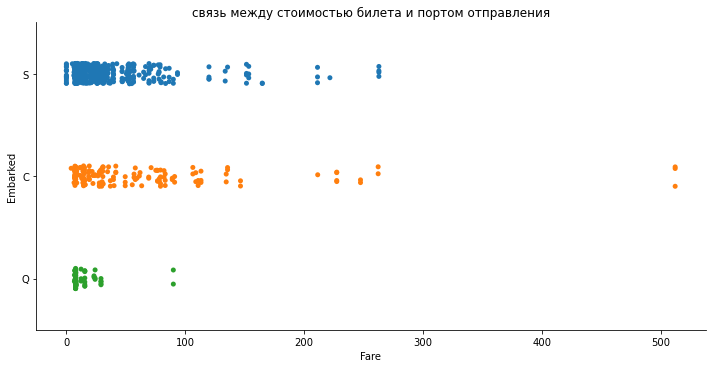

In [43]:
sns.catplot(x='Fare', y='Embarked', aspect=2, data=df)
plt.title('связь между стоимостью билета и портом отправления');

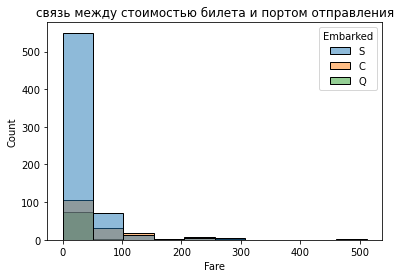

In [87]:
sns.histplot(x = 'Fare', hue = 'Embarked', data = df, bins = 10)
plt.title('связь между стоимостью билета и портом отправления');

In [26]:
min(df['Fare']), max(df['Fare'])

(0.0, 512.3292)

In [27]:
min(df['Fare'][df['Embarked']=='S']), max(df['Fare'][df['Embarked']=='S'])

(0.0, 263.0)

**9. Выведите гистограммы, показывающие распределения стоимостей билетов в зависимости от места посадки.**

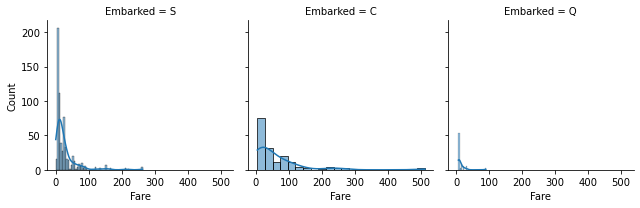

In [30]:
g = sns.FacetGrid(data=df, col='Embarked')
g.map(sns.histplot, 'Fare', kde=True);

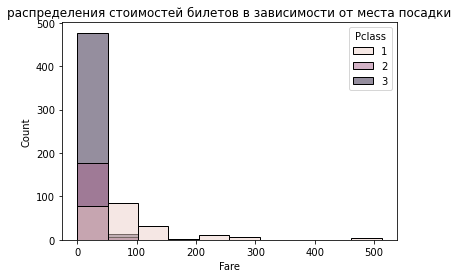

In [28]:
sns.histplot(x = 'Fare', hue = 'Pclass', data = df, bins = 10)
plt.title('распределения стоимостей билетов в зависимости от места посадки');